In [ ]:
# 02_preprocessing.ipynb

# GOAL: Apply cleaning techniques to images. 

# TASKS
# read all training and validation images
# apply consistent preprocessing steps 
# convert to grayscale (if needed)
# resize (e.g., 128×128 or 64×64)
# normalize or enhance contrast
# optionally reduce noise
# save preprocessed images to "data/processed"

In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import glob
import random

In [3]:
# configuration
INPUT_SPLITS = ["train", "validation"]
INPUT_ROOT = "../data/raw/NEU-DET"
OUTPUT_ROOT = "../data/processed/NEU-DET"
TARGET_SIZE = (128, 128) # this can be (64, 64) or (128, 128)

In [4]:
# create a cascade of cleaning techniques
def preprocess_image(img_path, size=TARGET_SIZE): 
    img = cv2.imread(img_path)
    if img is None: 
        raise ValueError("Image not found: {img_path}")

    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # resize to a fixed size
    resized = cv2.resize(gray, size)

    # histogram equalization (contrast enhancement)
    equalized = cv2.equalizeHist(resized)

    # OPTIONAL: add Gaussian blur
    equalized = cv2.GaussianBlur(equalized, (3, 3), 0)

    return equalized

In [5]:
# create output folders and process images
for split in INPUT_SPLITS: 
    input_dir = os.path.join(INPUT_ROOT, split, "images")
    output_dir = os.path.join(OUTPUT_ROOT, split, "images")
    os.makedirs(output_dir, exist_ok=True)

    image_paths = glob.glob(os.path.join(input_dir, "**", "*.jpg"), recursive=True)
    print(f"✅ Processing {len(image_paths)} images in '{split}' split...")

    for img_path in tqdm(image_paths): 
        rel_path = os.path.relpath(img_path, input_dir) # e.g., "scratches/img_123.jpg"
        out_path = os.path.join(output_dir, rel_path)

        os.makedirs(os.path.dirname(out_path), exist_ok=True)

        try: 
            processed = preprocess_image(img_path)
            cv2.imwrite(out_path, processed)
        except Exception as e: 
            print(f"❌ Failed to process {img_path}: {e}")

✅ Processing 1440 images in 'train' split...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1440/1440 [00:00<00:00, 2508.25it/s]


✅ Processing 360 images in 'validation' split...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 360/360 [00:00<00:00, 2539.16it/s]


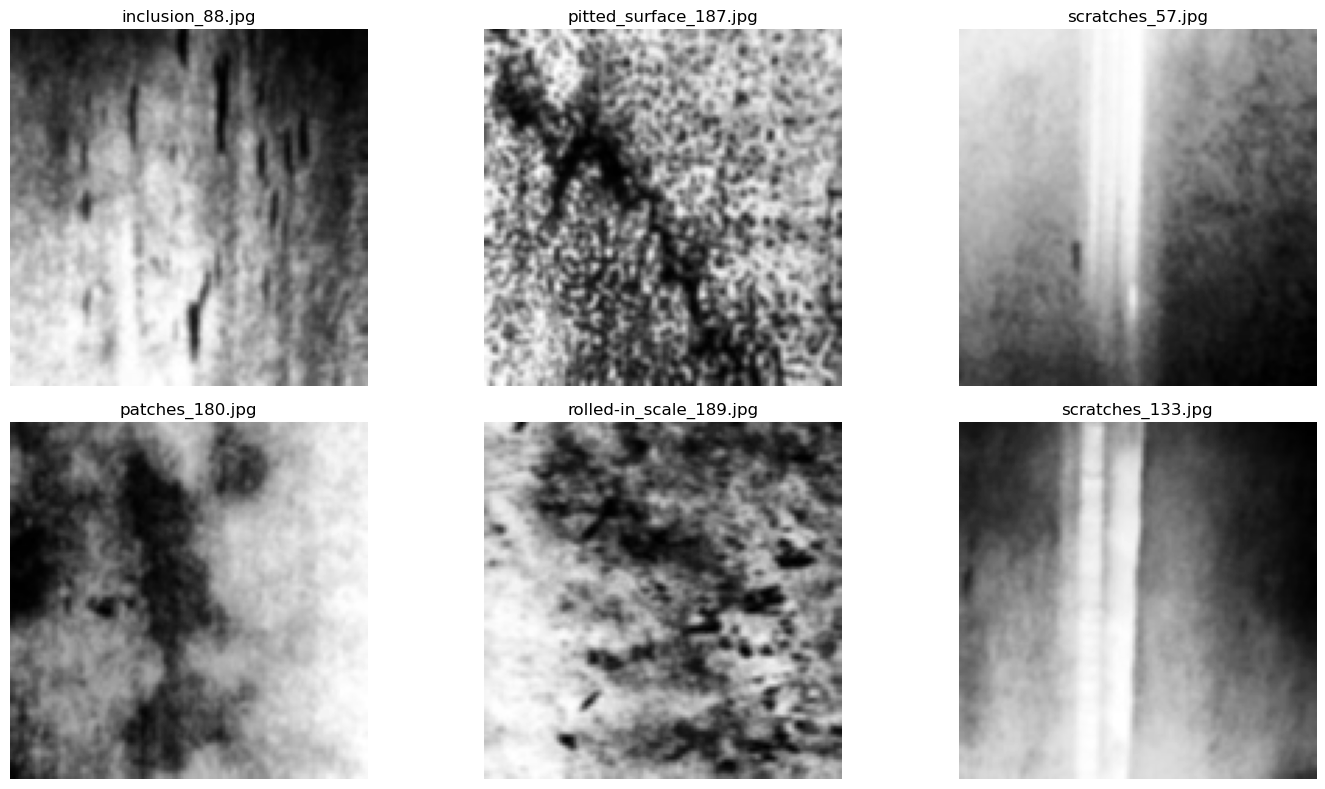

In [6]:
# preview preprocessed images
# FIXED: corrected variable name OUPUT_ROOT → OUTPUT_ROOT
sample_dir = os.path.join(OUTPUT_ROOT, "train", "images")  
sample_images = glob.glob(os.path.join(sample_dir, "**", "*.jpg"), recursive=True)

# add a check in case fewer than 6 images are available
num_samples = min(6, len(sample_images))
sample_paths = random.sample(sample_images, num_samples)

# display images
plt.figure(figsize=(15, 8))
for i, path in enumerate(sample_paths): 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(os.path.basename(path))
    plt.axis("off")

plt.tight_layout()
plt.show()